In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_ffiv = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/FFIV_Stock.csv"
df_ffiv = pd.read_csv(csv_ffiv, thousands=',')

In [3]:
df_ffiv.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,FFIV,166.529999,166.529999,168.330002,165.419998,167.600006,756400
1,3/4/2019,FFIV,163.289993,163.289993,167.289993,161.710007,166.970001,553700
2,3/5/2019,FFIV,162.149994,162.149994,163.399994,161.970001,163.240005,511300
3,3/6/2019,FFIV,161.080002,161.080002,162.139999,159.949997,161.919998,527000
4,3/7/2019,FFIV,158.990005,158.990005,161.250000,157.910004,160.630005,783200


In [4]:
df_ffiv.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03
mean,163.434992,163.434992,165.268542,161.482228,163.397160,6.147710e+05
std,29.329932,29.329932,29.577160,29.115418,29.336975,3.981027e+05
min,90.550003,90.550003,93.830002,79.779999,88.750000,1.205000e+05
25%,141.537506,141.537506,143.384998,139.952503,141.632496,3.971500e+05
50%,155.590004,155.590004,157.345001,154.154999,156.070000,5.293500e+05
75%,186.022503,186.022503,187.654995,184.379997,186.260002,6.974750e+05
max,247.779999,247.779999,249.000000,245.899994,247.779999,5.232700e+06


In [5]:
df_ffiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1324 non-null   object 
 1   Symbol     1324 non-null   object 
 2   Adj Close  1324 non-null   float64
 3   Close      1324 non-null   float64
 4   High       1324 non-null   float64
 5   Low        1324 non-null   float64
 6   Open       1324 non-null   float64
 7   Volume     1324 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.9+ KB


In [6]:
# Convert object to datetime64
df_ffiv['Date'] = df_ffiv['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_ffiv = df_ffiv.sort_values(by="Date").reset_index(drop=True)
df_ffiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1324 non-null   datetime64[ns]
 1   Symbol     1324 non-null   object        
 2   Adj Close  1324 non-null   float64       
 3   Close      1324 non-null   float64       
 4   High       1324 non-null   float64       
 5   Low        1324 non-null   float64       
 6   Open       1324 non-null   float64       
 7   Volume     1324 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [7]:
df_ffiv.Close

0       166.529999
1       163.289993
2       162.149994
3       161.080002
4       158.990005
           ...    
1319    168.339996
1320    168.229996
1321    167.300003
1322    168.970001
1323    166.910004
Name: Close, Length: 1324, dtype: float64

In [8]:
df_ffiv['Prev_close'] = df_ffiv.shift(1)['Close']
df_ffiv.Prev_close

0              NaN
1       166.529999
2       163.289993
3       162.149994
4       161.080002
           ...    
1319    169.899994
1320    168.339996
1321    168.229996
1322    167.300003
1323    168.970001
Name: Prev_close, Length: 1324, dtype: float64

In [9]:
df_ffiv.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-03-01,FFIV,166.529999,166.529999,168.330002,165.419998,167.600006,756400,NaN
1,2019-03-04,FFIV,163.289993,163.289993,167.289993,161.710007,166.970001,553700,166.529999
2,2019-03-05,FFIV,162.149994,162.149994,163.399994,161.970001,163.240005,511300,163.289993
3,2019-03-06,FFIV,161.080002,161.080002,162.139999,159.949997,161.919998,527000,162.149994
4,2019-03-07,FFIV,158.990005,158.990005,161.250000,157.910004,160.630005,783200,161.080002


In [10]:
df_ffiv['Close_change'] = df_ffiv.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [11]:
df_ffiv.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-03-01,FFIV,166.529999,166.529999,168.330002,165.419998,167.600006,756400,NaN,0.000000
1,2019-03-04,FFIV,163.289993,163.289993,167.289993,161.710007,166.970001,553700,166.529999,-3.240005
2,2019-03-05,FFIV,162.149994,162.149994,163.399994,161.970001,163.240005,511300,163.289993,-1.139999
3,2019-03-06,FFIV,161.080002,161.080002,162.139999,159.949997,161.919998,527000,162.149994,-1.069992
4,2019-03-07,FFIV,158.990005,158.990005,161.250000,157.910004,160.630005,783200,161.080002,-2.089996


In [12]:
rows = []
for _,row in tqdm(df_ffiv.iterrows(), total=df_ffiv.shape[0]):
    row_data = dict(
        date = row.Date,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_ffiv = pd.DataFrame(rows)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [13]:
features_ffiv.head()

,date,open,low,high,close,volume,close_change
0,2019-03-01,167.600006,166.529999,168.330002,166.529999,756400,0.000000
1,2019-03-04,166.970001,163.289993,167.289993,163.289993,553700,-3.240005
2,2019-03-05,163.240005,162.149994,163.399994,162.149994,511300,-1.139999
3,2019-03-06,161.919998,161.080002,162.139999,161.080002,527000,-1.069992
4,2019-03-07,160.630005,158.990005,161.250000,158.990005,783200,-2.089996


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_ffiv, 'close')

Empty DataFrame
Columns: [date, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_ffiv, 'volume')

           date        open         low        high       close   volume   
7    2019-03-12  153.639999  149.649994  154.699997  149.649994  2278500  \
8    2019-03-13  149.779999  151.750000  153.119995  151.750000  1252400   
60   2019-05-28  137.850006  136.639999  138.710007  136.639999  1217900   
73   2019-06-14  140.449997  136.929993  142.330002  136.929993  1187500   
78   2019-06-21  142.210007  143.729996  143.860001  143.729996  1869500   
...         ...         ...         ...         ...         ...      ...   
1197 2023-11-30  170.130005  171.190002  172.169998  171.190002  2644200   
1208 2023-12-15  176.919998  177.619995  177.919998  177.619995  1293400   
1236 2024-01-29  183.789993  185.369995  185.919998  185.369995  1156600   
1237 2024-01-30  195.009995  186.839996  199.490005  186.839996  1780100   
1300 2024-04-30  162.250000  165.309998  170.000000  165.309998  2061300   

      close_change  
7       -12.440002  
8         2.100006  
60       -0.300003  
73 

In [17]:
detect_outlier(features_ffiv, 'close_change')

           date        open         low        high       close   volume   
7    2019-03-12  153.639999  149.649994  154.699997  149.649994  2278500  \
73   2019-06-14  140.449997  136.929993  142.330002  136.929993  1187500   
165  2019-10-24  150.000000  145.940002  153.000000  145.940002  2154200   
229  2020-01-28  125.040001  126.000000  131.309998  126.000000  2594700   
257  2020-03-09  114.000000  111.690002  119.639999  111.690002  1284600   
259  2020-03-11  114.730003  107.800003  115.589996  107.800003  1027700   
260  2020-03-12  101.089996   98.330002  104.559998   98.330002  1193200   
261  2020-03-13  103.220001  105.699997  105.779999  105.699997  1397900   
262  2020-03-16   95.169998   95.660004  100.059998   95.660004   907200   
265  2020-03-19   89.059998   98.330002  101.239998   98.330002  1127800   
270  2020-03-26  105.180000  114.050003  115.349998  114.050003  1043700   
292  2020-04-28  147.850006  140.860001  153.559998  140.860001  4579400   
302  2020-05

In [18]:
features_ffiv = features_ffiv.set_index("date")
features_ffiv.head()

,open,low,high,close,volume,close_change
date,,,,,,
2019-03-01,167.600006,166.529999,168.330002,166.529999,756400,0.000000
2019-03-04,166.970001,163.289993,167.289993,163.289993,553700,-3.240005
2019-03-05,163.240005,162.149994,163.399994,162.149994,511300,-1.139999
2019-03-06,161.919998,161.080002,162.139999,161.080002,527000,-1.069992
2019-03-07,160.630005,158.990005,161.250000,158.990005,783200,-2.089996


In [19]:
train_size = int(0.7 * len(features_ffiv))
test_size = len(features_ffiv)-train_size

train_ffiv_df = features_ffiv[:train_size]
test_ffiv_df = features_ffiv[train_size:]

Text(0.5, 1.0, 'Time Series Plots of FFIV stock')

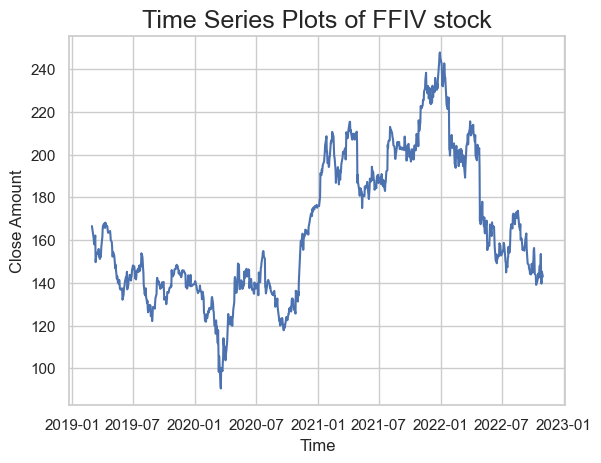

In [20]:
fig, ax = plt.subplots()
ax.plot(train_ffiv_df.index, train_ffiv_df['close'])
ax.set_ylabel('Close Amount')
ax.set_xlabel('Time')
ax.set_title('Time Series Plots of FFIV stock', size=18)

Text(0.5, 0, 'Y')

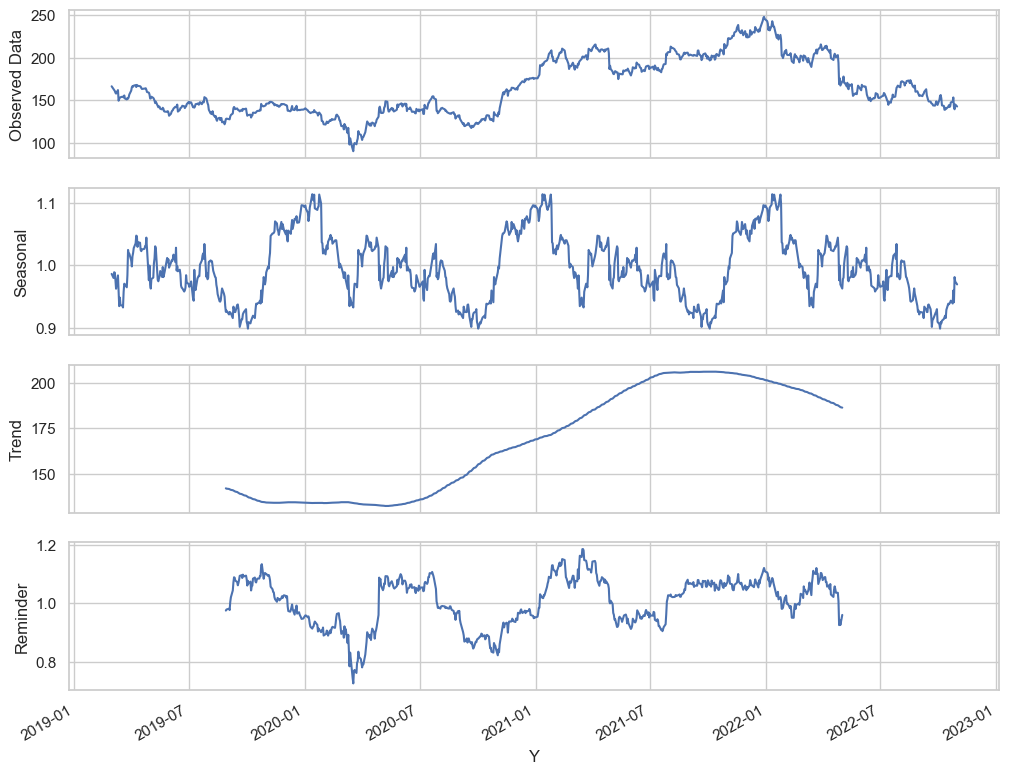

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(train_ffiv_df['close'], model='multiplicative', period=252)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
ax1.set_ylabel('Observed Data')
res.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')
res.trend.plot(ax=ax3)
ax3.set_ylabel('Trend')
res.resid.plot(ax=ax4)
ax4.set_ylabel('Reminder')

plt.xlabel("Y")

### Determine Error, Trend and Seasonality

An ETS model has three main components: error, trend, and seasonality. Each can be applied either additively, multiplicatively, or not at all. We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the three components.

1. Trend - If the trend plot is linear then we apply it additively (A). If the trend line grows or shrinks exponentially, we apply it multiplicatively (M). If there is no clear trend, no trend component is included (N).

2. Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply it multiplicatively (M). If there is no seasonality, it is not applied (N).

3. Error - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply it additively (A). If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

In [22]:
# Import the relevant libraries 
from statsmodels.tsa.exponential_smoothing.ets import ETSModel 
train_ffiv_df1 = pd.Series(train_ffiv_df['close']).astype('float64')
ets_model = ETSModel(train_ffiv_df1, error='mul', trend='add', seasonal = 'add', 
                     damped_trend=True, seasonal_periods=5, initial_level=train_ffiv_df.values.mean())
ets_fitted = ets_model.fit()
print(ets_fitted.summary())

C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                  close   No. Observations:                  926
Model:                      ETS(MAdA)   Log Likelihood               -2453.862
Date:                Mon, 17 Jun 2024   AIC                           4931.723
Time:                        23:28:51   BIC                           4989.694
Sample:                             0   HQIC                          4953.838
                                - 926   Scale                            0.000
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9395      0.040     23.388      0.000       0.861       1.018
smoothing_trend        0.0141      0.032      0.440      0.660      -0.048       0.077
smoothing_seasonal  

In [23]:
# Quá trình testing
# Forecast the values for the test set
test_predictions = ets_fitted.predict(start=len(train_ffiv_df), end=len(train_ffiv_df) + len(test_ffiv_df) - 1 )
test_dates = pd.date_range(start=test_ffiv_df.index[0], periods=len(test_predictions))
test_predictions.index = test_dates
# Output the forecasted values for the test set
print("Test Set Predictions:")
print(test_predictions)

Test Set Predictions:
2022-11-01    143.329568
2022-11-02    143.099465
2022-11-03    142.830399
2022-11-04    142.996767
2022-11-05    142.965393
                 ...    
2023-11-29    142.956582
2023-11-30    142.933245
2023-12-01    143.251081
2023-12-02    143.036675
2023-12-03    142.780167
Freq: D, Length: 398, dtype: float64


C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
#Predict the closing prices for the next 30 days
forecast_horizon = 30
forecast_dates = pd.date_range(start=features_ffiv.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_30_days = ets_fitted.predict(start=len(features_ffiv), end=len(features_ffiv) + forecast_horizon - 1)
forecast_30_days.index = forecast_dates
print(forecast_30_days)

2024-06-04    142.956582
2024-06-05    142.933245
2024-06-06    143.251081
2024-06-07    143.036675
2024-06-08    142.780167
2024-06-09    142.956582
2024-06-10    142.933245
2024-06-11    143.251081
2024-06-12    143.036675
2024-06-13    142.780167
2024-06-14    142.956582
2024-06-15    142.933245
2024-06-16    143.251081
2024-06-17    143.036675
2024-06-18    142.780167
2024-06-19    142.956582
2024-06-20    142.933245
2024-06-21    143.251081
2024-06-22    143.036675
2024-06-23    142.780167
2024-06-24    142.956582
2024-06-25    142.933245
2024-06-26    143.251081
2024-06-27    143.036675
2024-06-28    142.780167
2024-06-29    142.956582
2024-06-30    142.933245
2024-07-01    143.251081
2024-07-02    143.036675
2024-07-03    142.780167
Freq: D, dtype: float64


C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
#Predict the closing prices for the next 60 days
forecast_horizon = 60
forecast_dates = pd.date_range(start=features_ffiv.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_60_days = ets_fitted.predict(start=len(features_ffiv), end=len(features_ffiv) + forecast_horizon - 1)
forecast_60_days.index = forecast_dates
print(forecast_60_days)

2024-06-04    142.956582
2024-06-05    142.933245
2024-06-06    143.251081
2024-06-07    143.036675
2024-06-08    142.780167
2024-06-09    142.956582
2024-06-10    142.933245
2024-06-11    143.251081
2024-06-12    143.036675
2024-06-13    142.780167
2024-06-14    142.956582
2024-06-15    142.933245
2024-06-16    143.251081
2024-06-17    143.036675
2024-06-18    142.780167
2024-06-19    142.956582
2024-06-20    142.933245
2024-06-21    143.251081
2024-06-22    143.036675
2024-06-23    142.780167
2024-06-24    142.956582
2024-06-25    142.933245
2024-06-26    143.251081
2024-06-27    143.036675
2024-06-28    142.780167
2024-06-29    142.956582
2024-06-30    142.933245
2024-07-01    143.251081
2024-07-02    143.036675
2024-07-03    142.780167
2024-07-04    142.956582
2024-07-05    142.933245
2024-07-06    143.251081
2024-07-07    143.036675
2024-07-08    142.780167
2024-07-09    142.956582
2024-07-10    142.933245
2024-07-11    143.251081
2024-07-12    143.036675
2024-07-13    142.780167


C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
#Predict the closing prices for the next 90 days
forecast_horizon = 90
forecast_dates = pd.date_range(start=features_ffiv.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_90_days = ets_fitted.predict(start=len(features_ffiv), end=len(features_ffiv) + forecast_horizon - 1)
forecast_90_days.index = forecast_dates
print(forecast_90_days)

2024-06-04    142.956582
2024-06-05    142.933245
2024-06-06    143.251081
2024-06-07    143.036675
2024-06-08    142.780167
                 ...    
2024-08-28    142.956582
2024-08-29    142.933245
2024-08-30    143.251081
2024-08-31    143.036675
2024-09-01    142.780167
Freq: D, Length: 90, dtype: float64

C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
ets_model_no_damped = ETSModel(train_ffiv_df1, error='mul', trend='add', seasonal = 'add', 
                      seasonal_periods=5, initial_level=train_ffiv_df.values.mean())
ets_fitted_no_damped = ets_model.fit()
print(ets_fitted_no_damped.summary())

C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                  close   No. Observations:                  926
Model:                      ETS(MAdA)   Log Likelihood               -2453.862
Date:                Mon, 17 Jun 2024   AIC                           4931.723
Time:                        23:28:53   BIC                           4989.694
Sample:                             0   HQIC                          4953.838
                                - 926   Scale                            0.000
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9395      0.040     23.388      0.000       0.861       1.018
smoothing_trend        0.0141      0.032      0.440      0.660      -0.048       0.077
smoothing_seasonal  

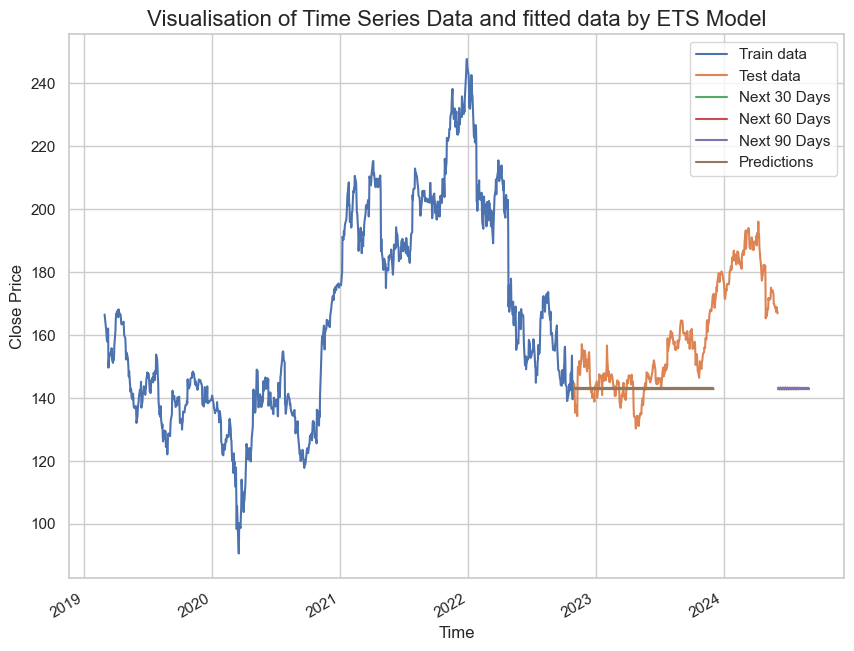

In [28]:
plt.figure(figsize=(10,8))
train_ffiv_df1.plot(label='Train data')
test_ffiv_df['close'].plot(label='Test data')
forecast_30_days.plot(label='Next 30 Days')
forecast_60_days.plot(label='Next 60 Days')
forecast_90_days.plot(label='Next 90 Days')
test_predictions.plot(label='Predictions')
plt.title('Visualisation of Time Series Data and fitted data by ETS Model' , fontsize=16)
plt.ylabel("Close Price");
plt.xlabel("Time")
plt.legend();